<a href="https://colab.research.google.com/github/SrivikramMV/CSC2031/blob/main/CSC2034_Project_FInal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artefact: Exploratory Data Analysis and Modeling for Wine Quality Prediction

## Introduction

The primary objective of this project is to explore the use of data-driven techniques in predicting wine quality based on various features such as alcohol content, residual sugar, acidity, and more.

Through this project, I seek to gain a deeper understanding of data science methodologies and their application in real-world scenarios. By analyzing a dataset containing information about red and white wines, I intend to explore the relationships between different wine attributes and quality ratings.

## Task 1A: Distribution of Wine Quality





Before analyzing the distribution of wine quality, I felt curious about how quality varies across different types of wine. To achieve this task, I'm going to load the red and white wine datasets and merged the datasets into a single dataframe.

In [2]:
import pandas as pd

red_wine_file = "winequality-red.csv"
red_wine_df = pd.read_csv(red_wine_file, sep=';')

white_wine_file = "winequality-white.csv"
white_wine_df = pd.read_csv(white_wine_file, sep=';')

red_wine_df['wine_type'] = 'red'
white_wine_df['wine_type'] = 'white'

combined_df = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

print(combined_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4        5       red  
1      9.8        5   

In [3]:
wine_quality_stats = combined_df.groupby('wine_type')['quality'].describe()

print(wine_quality_stats)

            count      mean       std  min  25%  50%  75%  max
wine_type                                                     
red        1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0
white      4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0


Having now also computed the summary statistics, I'm going to visualize the distribution of wine quality using a box plot to compare the quality distributions between red and white wines visually.

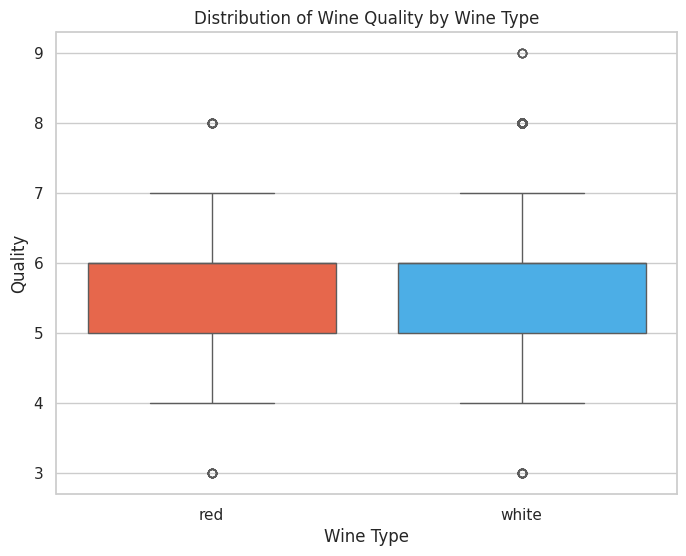

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='wine_type', y='quality', data=combined_df, hue = 'wine_type', palette=["#FF5733", "#33B5FF"])
plt.title('Distribution of Wine Quality by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Quality')
plt.show()

Using this approach, I was able to describe the distribution of wine quality across all samples, separately for red and white wines, and compare the quality distributions between reds and whites. Further details can be found in my report under Task 1A.

## Task 1B: Discretization of Alcohol Content

Setting the Boundaries: Calculating the Mean and Standard Deviation

I am computing the mean (x̄) and standard deviation (σ) of the alcohol content variable for red wine. Then, I can determine the low threshold by subtracting the standard deviation from the mean (x̄ - σ) and the high threshold by adding the standard deviation to the mean (x̄ + σ). These thresholds will help me define the "low," "mid," and "high" ranges of alcohol content, providing a basis for discretization.

In [7]:
red_mean_alcohol = red_wine_df['alcohol'].mean()
red_std_alcohol = red_wine_df['alcohol'].std()

print("Mean alcohol content (red wine):", red_mean_alcohol)
print("Standard deviation of alcohol content (red wine):", red_std_alcohol)

print("-----------------------------------------------------------------------")

low_threshold_red = red_mean_alcohol - red_std_alcohol
high_threshold_red = red_mean_alcohol + red_std_alcohol

print("Low threshold for alcohol content (red wine):", low_threshold_red)
print("High threshold for alcohol content (red wine):", high_threshold_red)

Mean alcohol content (red wine): 10.422983114446529
Standard deviation of alcohol content (red wine): 1.0656675818473946
-----------------------------------------------------------------------
Low threshold for alcohol content (red wine): 9.357315532599134
High threshold for alcohol content (red wine): 11.488650696293924


With this, I can now create the 3-valued "alcohol_cat" variable

In [8]:
import numpy as np

red_wine_df['alcohol_cat'] = pd.cut(red_wine_df['alcohol'], bins=[-np.inf, low_threshold_red, high_threshold_red, np.inf], labels=['low', 'mid', 'high'])
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,alcohol_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,mid
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mid
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,mid
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mid
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,mid


The same process can now be applied for white wine as well.

In [9]:
white_mean_alcohol = white_wine_df['alcohol'].mean()
white_std_alcohol = white_wine_df['alcohol'].std()

print("Mean alcohol content (white wine):", white_mean_alcohol)
print("Standard deviation of alcohol content (white wine):", white_std_alcohol)

print("-----------------------------------------------------------------------")

low_threshold_white = white_mean_alcohol - white_std_alcohol
high_threshold_white = white_mean_alcohol + white_std_alcohol

print("Low threshold for alcohol content (white wine):", low_threshold_white)
print("High threshold for alcohol content (white wine):", high_threshold_white)

Mean alcohol content (white wine): 10.514267047774602
Standard deviation of alcohol content (white wine): 1.230620567757318
-----------------------------------------------------------------------
Low threshold for alcohol content (white wine): 9.283646480017284
High threshold for alcohol content (white wine): 11.74488761553192


In [10]:
white_wine_df['alcohol_cat'] = pd.cut(white_wine_df['alcohol'], bins=[-np.inf, low_threshold_white, high_threshold_white, np.inf], labels=['low', 'mid', 'high'])
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,alcohol_cat
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,low
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,mid
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,mid
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,mid
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,mid


## Task 1C: Analysis of Wine Quality by Alcohol Content


In this task, I aim to analyze the distribution of wine quality scores based on different levels of alcohol content. To achieve this, I'll create visualizations separately for low-, mid-, and high-alcohol content categories for both red and white wines.

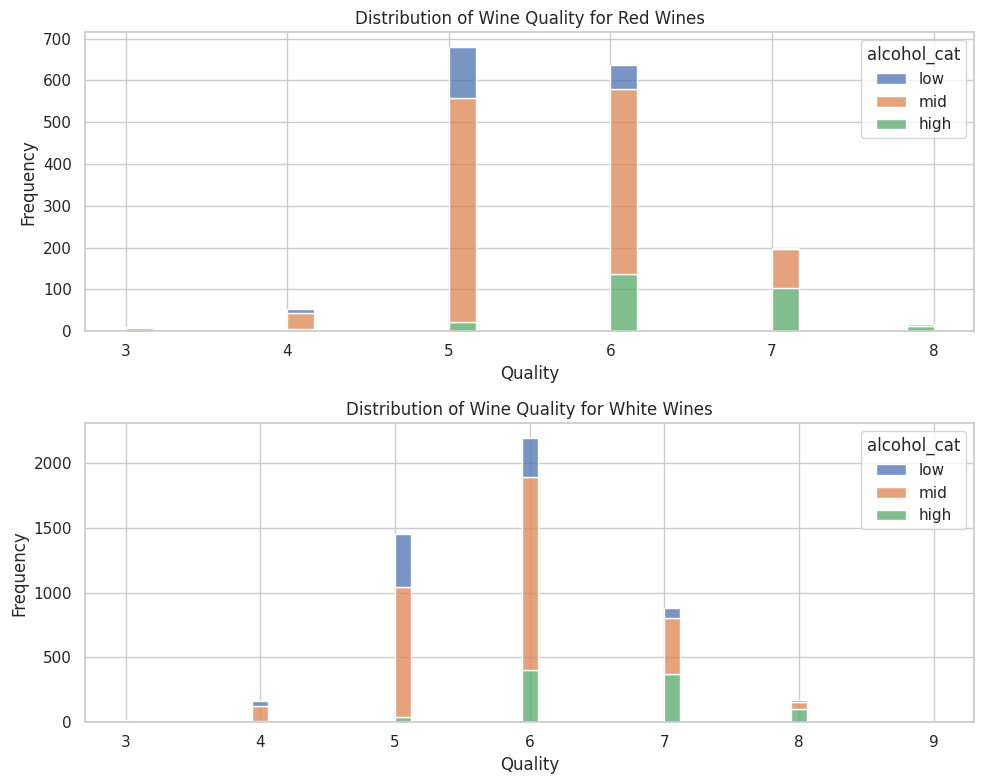

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(data=red_wine_df, x='quality', hue='alcohol_cat', multiple='stack', ax=axes[0])
axes[0].set_title('Distribution of Wine Quality for Red Wines')
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Frequency')

sns.histplot(data=white_wine_df, x='quality', hue='alcohol_cat', multiple='stack', ax=axes[1])
axes[1].set_title('Distribution of Wine Quality for White Wines')
axes[1].set_xlabel('Quality')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The visualizations presented here provide a clear overview of the distribution of wine quality scores based on different levels of alcohol content for both red and white wines. Further insights and observations regarding the relationship between alcohol content and wine quality can be found in Task 1C of my report.

## Task 1D: Plotting Residual Sugar and Creating the IsSweet Variable

I'll begin by visualizing the distribution of residual sugar in both red and white wines using a histogram. This visualization will provide insights into the sweetness profile of the wines.

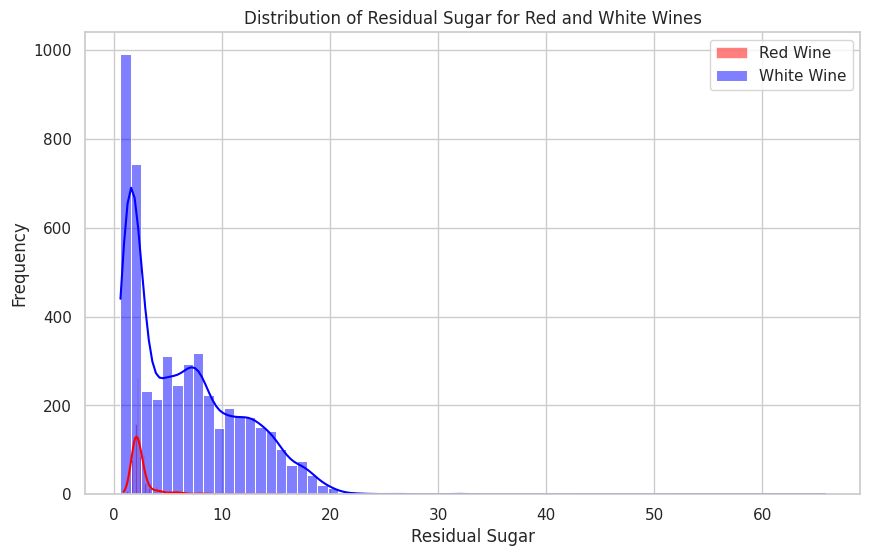

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(data=red_wine_df, x='residual sugar', color='red', label='Red Wine', kde=True)
sns.histplot(data=white_wine_df, x='residual sugar', color='blue', label='White Wine', kde=True)

plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.title('Distribution of Residual Sugar for Red and White Wines')

plt.legend()

plt.show()

Upon examination, a threshold of 3.5 seems appropriate as it represents the lowest point for both the red and white wine lines between their maximum points. This threshold would effectively balance the dataset into two classes, allowing for a balanced classification model.



## Task 1E: Distribution Analysis of Quality vs. IsSweet

Using the threshold value from Task 1D, I can create a binary variable called 'isSweet,' through which I can categorize wines based on their sweetness level.

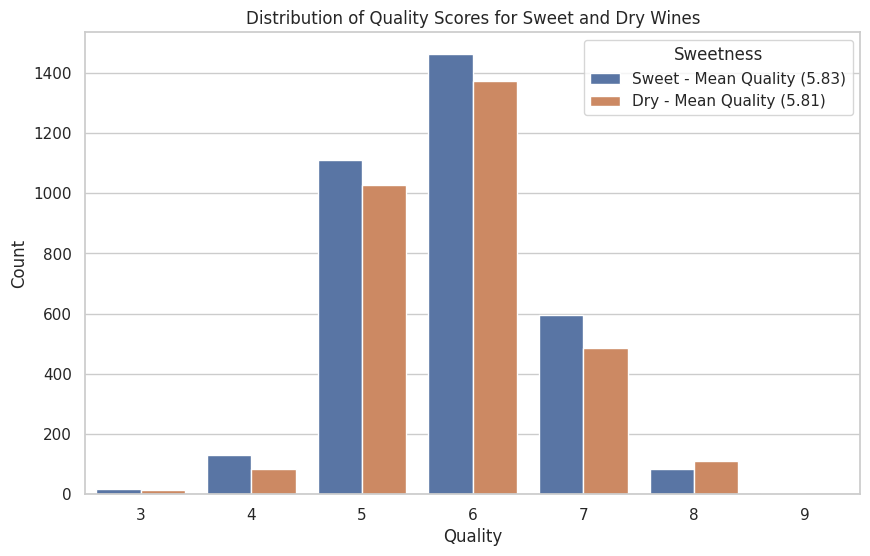


Mean Quality of Sweet wines: 5.828543752018082
Mean Quality of Dry wines: 5.809117647058824


In [20]:
threshold_sweetness = 3.5

def label_sweetness(residual_sugar):
    if residual_sugar >= threshold_sweetness:
        return 'sweet'
    else:
        return 'dry'

combined_df['isSweet'] = combined_df['residual sugar'].apply(label_sweetness)

mean_quality_sweet = combined_df[combined_df['isSweet'] == 'sweet']['quality'].mean()
mean_quality_dry = combined_df[combined_df['isSweet'] == 'dry']['quality'].mean()

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='quality', hue='isSweet')
plt.title('Distribution of Quality Scores for Sweet and Dry Wines')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.legend(title='Sweetness', loc='upper right', labels=[f'Sweet - Mean Quality ({mean_quality_sweet:.2f})', f'Dry - Mean Quality ({mean_quality_dry:.2f})'])

plt.show()

print()
print("Mean Quality of Sweet wines:", mean_quality_sweet)
print("Mean Quality of Dry wines:", mean_quality_dry)


The plot indicates that there are more dry wines than sweet wines, but most notable the mean quality values points towards Sweet wines being of marginally higher quality. My final thoughts about this can be found under Task 1E in my report.

## Task 2: Analysis of Correlations

To lay the groundwork for machine learning model creation, I initiated by analyzing correlations between variables. This step is crucial for identifying the most informative subset of features. I opted for Spearman correlation as it accommodates both ordinal and continuous data, which are present in my dataset, unlike Pearson and Kendall metrics.

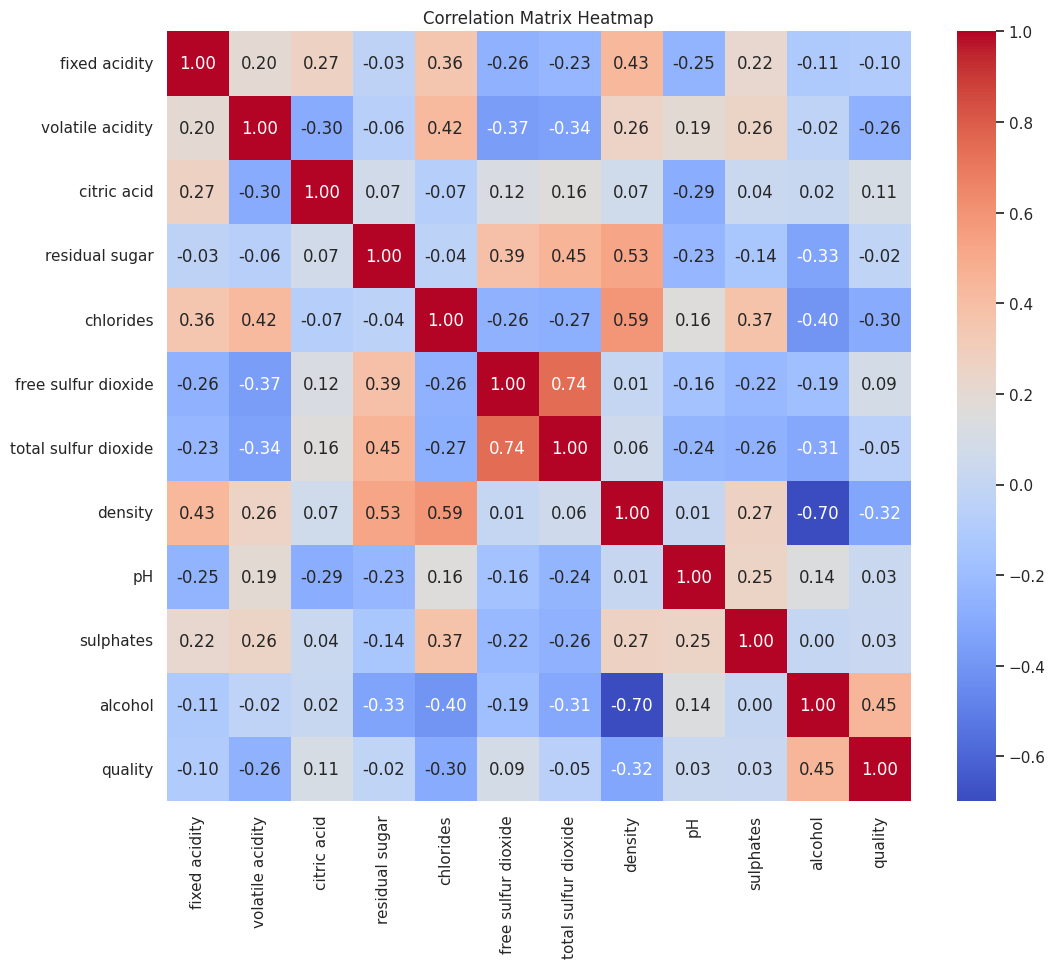

In [22]:
correlation_matrix = combined_df.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix Heatmap')

plt.show()

The heatmap vividly illustrates the correlations among variables. Notably, it reveals relationships that are not readily apparent in the raw data. My detailed observations regarding these correlations are documented under Task 2 of my report.

## Task 3: Comparing Machine Learning Approaches

In this task, I am experimenting with various machine learning approaches to create a predictive model for wine quality. I am going to start with logistic regression, followed by linear regression and decision trees.

#### Binary Classification with Logistic Regression

To begin, I'm preparing the data by applying StandardScaler for feature scaling to normalize the feature variables. This normalization ensures that all features are on the same scale, preventing any particular feature from dominating the others during model training.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

wines_df = combined_df.copy()

wines_df = pd.get_dummies(wines_df, columns=['wine_type', 'isSweet'], drop_first=True)

X = wines_df.drop('quality', axis=1)
y = wines_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train_scaled, y_train)

accuracy = logreg.score(X_test_scaled, y_test)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.5407692307692308


Upon execution, the Logistic Regression model achieves an accuracy of ~0.54. Now, I will proceed with experimenting with different thresholds for binary classification to refine the model.

Experimentation with Thresholds:

For this experimentation, I'm creating a function evaluate_model_with_threshold to evaluate the model's performance with different thresholds.

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model_with_threshold(X_test_scaled, y_test, threshold):
    y_pred = logreg.predict(X_test_scaled)
    y_pred_binary = (y_pred >= threshold).astype(int)
    y_test_binary = (y_test >= threshold).astype(int)

    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    precision = precision_score(y_test_binary, y_pred_binary, zero_division=1)
    recall = recall_score(y_test_binary, y_pred_binary)
    f1 = f1_score(y_test_binary, y_pred_binary)

    print(f"Binary Classification Metrics for Threshold {threshold}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()

thresholds = [3, 4, 5, 6, 7, 8, 9]

for threshold in thresholds:
    evaluate_model_with_threshold(X_test_scaled, y_test, threshold)

Binary Classification Metrics for Threshold 3:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Binary Classification Metrics for Threshold 4:
Accuracy: 0.9961538461538462
Precision: 0.9961508852963818
Recall: 1.0
F1-score: 0.9980717315850366

Binary Classification Metrics for Threshold 5:
Accuracy: 0.9669230769230769
Precision: 0.9667697063369397
Recall: 1.0
F1-score: 0.9831041257367387

Binary Classification Metrics for Threshold 6:
Accuracy: 0.7261538461538461
Precision: 0.7924080664294187
Recall: 0.7868080094228505
F1-score: 0.789598108747045

Binary Classification Metrics for Threshold 7:
Accuracy: 0.8246153846153846
Precision: 0.6363636363636364
Recall: 0.2222222222222222
F1-score: 0.32941176470588235

Binary Classification Metrics for Threshold 8:
Accuracy: 0.9715384615384616
Precision: 1.0
Recall: 0.0
F1-score: 0.0

Binary Classification Metrics for Threshold 9:
Accuracy: 0.9992307692307693
Precision: 1.0
Recall: 0.0
F1-score: 0.0



Code Explanation:

The list of thresholds [3, 4, 5, 6, 7, 8, 9] is used to experiment with different threshold values for binary classification. Each threshold represents a cutoff point for classifying wine quality as either low or high. By iterating over this list, I was able to evaluate the model's performance across a range of classification scenarios.

Based on these findings, I'll further analyze the model's performance in my report under Task 3.

Comments on the Output:

For thresholds 3, 8, and 9, the binary classification metrics reveal poor performance. This can be attributed to the binary classification threshold being set too low or too high. For threshold 3, all wines are classified as "high quality," resulting in perfect precision, recall, and F1-score. Conversely, for thresholds 8 and 9, too few are classified as "high quality," leading to precision, recall, and F1-score of 0. These results for these thresholds suggest that the model's predictions are overly simplistic or incorrect, failing to accurately classify wines into their quality categories.






#### Linear Regression

Now I will investigate the performance of linear regression in predicting wine quality as a continuous variable.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

linear_reg = LinearRegression()

linear_reg.fit(X_train_scaled, y_train)

y_pred = linear_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.5411548310306763
Mean Absolute Error (MAE): 0.5641880887642018
Root Mean Squared Error (RMSE): 0.7356322661701812


I followed a similar preprocessing approach as in logistic regression, including feature scaling using StandardScaler to normalize the feature variables.

Output Analysis:

After fitting the linear regression model, I evaluated its performance using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). The obtained MSE was approximately 0.54, indicating the model's accuracy in predicting quality values.

These metrics provide insight into the accuracy of the model's predictions, allowing for comparison with other machine learning approaches. Further analysis will be conducted to interpret these results in my report.

### Decision Trees

Finally, for decision trees, I will utilize the same preprocessed data.

In [29]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train_scaled, y_train)
y_pred_tree_classifier = tree_classifier.predict(X_test_scaled)
accuracy_tree_classifier = accuracy_score(y_test, y_pred_tree_classifier)
print("Decision Tree Classifier Accuracy:", accuracy_tree_classifier)

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train_scaled, y_train)
y_pred_tree_regressor = tree_regressor.predict(X_test_scaled)
mse_tree_regressor = mean_squared_error(y_test, y_pred_tree_regressor)
print("Decision Tree Regressor Mean Squared Error:", mse_tree_regressor)


Decision Tree Classifier Accuracy: 0.5961538461538461
Decision Tree Regressor Mean Squared Error: 0.7392307692307692


After training both decision tree classifier and regressor models, I've evaluated their performance. The classifier achieved an accuracy of approximately 0.60, while the regressor yielded an MSE of approximately 0.73.

These results provide valuable insights into the effectiveness of decision trees in predicting wine quality. I'll conduct further analysis to determine the most suitable model for my dataset, which you can find in my report.

### Final Conclusion

The experimentation with different machine learning approaches has shown interesting results in predicting wine quality. While logistic regression with a threshold of 4 demonstrates the most balanced performance in binary classification, linear regression and decision trees present alternative insights. The detailed analysis provided in Task 3 of the report offers a comprehensive understanding of each model's strengths and limitations, guiding further refinement and model selection.

## Task 4: Evaluating Model Performance with k-fold Cross Validation

I'm going to start by evaluating the performance of the **logistic regression** model for binary classification using K-Fold cross-validation.

I'm going to start by splitting the dataset into training and test sets, allocating 20% of the data for testing purposes. Then, I will employ Stratified K-Fold cross-validation with 5 folds to ensure that each fold maintains the class distribution of the original dataset.

For evaluation, I'm going to experiment with different threshold values (4, 5, 6, 7, 8) to categorize wine quality labels into "low" and "high" classes.

After selecting each threshold, I will train the logistic regression model on the training set and evaluate its performance on the test set. The F1-score, balancing precision and recall, will serve as the evaluation metric for both the training and test sets.

In [30]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg = LogisticRegression(max_iter=1000)

thresholds = [4, 5, 6, 7, 8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for threshold in thresholds:
    print(f"Evaluating model performance with threshold {threshold}:")

    y_train_binary = (y_train >= threshold).astype(int)

    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores_train = cross_val_score(logreg, X_train_scaled, y_train_binary, cv=cv_strategy, scoring='f1')

    print("F1-scores for each fold on training set:", f1_scores_train)

    average_f1_score_train = f1_scores_train.mean()
    print("Average F1-score on training set:", average_f1_score_train)

    logreg.fit(X_train_scaled, y_train_binary)

    y_test_binary = (y_test >= threshold).astype(int)

    y_pred_test = logreg.predict(X_test_scaled)

    f1_score_test = f1_score(y_test_binary, y_pred_test)
    print("F1-score on test set:", f1_score_test)

    print()


Evaluating model performance with threshold 4:
F1-scores for each fold on training set: [0.99759036 0.99807136 0.99807136 0.99758804 0.99758804]
Average F1-score on training set: 0.9977818308304608
F1-score on test set: 0.9980717315850366

Evaluating model performance with threshold 5:
F1-scores for each fold on training set: [0.97836775 0.98135427 0.98133595 0.98033432 0.98087298]
Average F1-score on training set: 0.9804530527172066
F1-score on test set: 0.981561396626128

Evaluating model performance with threshold 6:
F1-scores for each fold on training set: [0.81924198 0.79411765 0.81519357 0.80505952 0.79270073]
Average F1-score on training set: 0.8052626910505942
F1-score on test set: 0.7918367346938776

Evaluating model performance with threshold 7:
F1-scores for each fold on training set: [0.34591195 0.3566879  0.3630137  0.39072848 0.35211268]
Average F1-score on training set: 0.3616909398564747
F1-score on test set: 0.38547486033519557

Evaluating model performance with thresh

Observations:  As I vary the threshold values


*   For thresholds 4 and 5, the model demonstrates high F1-scores on both the training and test sets, indicating strong performance and generalization ability.
*   With thresholds above 5, the F1-scores gradually decline, suggesting reduced effectiveness in correctly classifying instances into their respective classes.
* Notably, thresholds 8 and 9 yield F1-scores of 0 for both training and test sets, indicating the model's inability to classify instances as "high" quality, likely due to dataset imbalance or overly stringent classification criteria.

Significance of Train-Test Set Performance:

* A significant performance gap between the training and test sets may indicate overfitting, where the model memorizes the training data but struggles to generalize to unseen data.

* Conversely, if the test set performs better than the training set, it could suggest potential issues such as data leakage or model underfitting.


Possible Solutions:

* To address overfitting, I can explore techniques such as regularization or reducing model complexity.

* Dealing with imbalanced datasets may involve strategies like oversampling, undersampling, or utilizing appropriate evaluation metrics like F1-score.

Next, I'm going to evaluate the **Linear Regression model**.

Starting with the dataset split into training and test sets, with 20% of the data allocated for testing, I will proceed to utilize K-Fold cross-validation with 5 folds. This ensures robust evaluation by partitioning the data into multiple subsets, training the model on each subset, and evaluating its performance on the remaining data.

For evaluation, I'll calculate mean squared error (MSE), root mean squared error (RMSE), and mean absolute error (MAE) as the metrics to assess the model's performance on both the training and test sets.

In [35]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

linear_reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

mse_scores_train = -cross_val_score(linear_reg, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
rmse_scores_train = np.sqrt(mse_scores_train)
mae_scores_train = -cross_val_score(linear_reg, X_train_scaled, y_train, cv=kf, scoring='neg_mean_absolute_error')

for fold, (mse_train, rmse_train, mae_train) in enumerate(zip(mse_scores_train, rmse_scores_train, mae_scores_train), 1):
    print(f"Fold {fold} on training set: MSE = {mse_train:.2f}, RMSE = {rmse_train:.2f}, MAE = {mae_train:.2f}")

linear_reg.fit(X_train_scaled, y_train)

y_pred_test = linear_reg.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print()
print(f"Training Set Metrics:")
print(f"Average MSE on training set: {mse_scores_train.mean():.2f}")
print(f"Average RMSE on training set: {rmse_scores_train.mean():.2f}")
print(f"Average MAE on training set: {mae_scores_train.mean():.2f}")

print()
print(f"MSE on test set: {mse_test:.2f}")
print(f"RMSE on test set: {rmse_test:.2f}")
print(f"MAE on test set: {mae_test:.2f}")


Fold 1 on training set: MSE = 0.58, RMSE = 0.76, MAE = 0.58
Fold 2 on training set: MSE = 0.50, RMSE = 0.71, MAE = 0.56
Fold 3 on training set: MSE = 0.53, RMSE = 0.73, MAE = 0.57
Fold 4 on training set: MSE = 0.55, RMSE = 0.74, MAE = 0.58
Fold 5 on training set: MSE = 0.53, RMSE = 0.73, MAE = 0.56

Training Set Metrics:
Average MSE on training set: 0.54
Average RMSE on training set: 0.73
Average MAE on training set: 0.57

MSE on test set: 0.54
RMSE on test set: 0.74
MAE on test set: 0.56


Observations:

* Across all folds, the model demonstrates consistent performance on the training set, with MSE values ranging from 0.50 to 0.58.

* The average MSE, RMSE, and MAE on the training set indicate a moderate level of error, with average values of 0.54, 0.73, and 0.57, respectively.

* On the test set, the model exhibits similar performance, with an MSE of 0.54, RMSE of 0.74, and MAE of 0.56.

Significance of Train-Test Set Performance:

* The comparable performance between the training and test sets suggests that the model generalizes well to unseen data, indicating a lack of overfitting or underfitting issues.

* The consistency in error metrics across folds and between the training and test sets reinforces the model's stability and reliability in predicting wine quality.

Finally, I'm going to evaluate the **Decision Tree** model, similar to linear regression, I will be using 5 folds.

In [36]:
from sklearn.model_selection import cross_val_score, KFold

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
tree_classifier_cv_scores_train = cross_val_score(tree_classifier, X_train_scaled, y_train, cv=cv_strategy, scoring='accuracy')
average_accuracy_train = tree_classifier_cv_scores_train.mean()
print("Decision Tree Classifier Average Accuracy (Training):", average_accuracy_train)

tree_regressor_cv_scores_train = cross_val_score(tree_regressor, X_train_scaled, y_train, cv=cv_strategy, scoring='neg_mean_squared_error')
average_mse_train = -tree_regressor_cv_scores_train.mean()
print("Decision Tree Regressor Average Mean Squared Error (Training):", average_mse_train)

accuracy_tree_classifier_test = accuracy_score(y_test, y_pred_tree_classifier)
print("Decision Tree Classifier Accuracy (Test):", accuracy_tree_classifier_test)

mse_tree_regressor_test = mean_squared_error(y_test, y_pred_tree_regressor)
print("Decision Tree Regressor Mean Squared Error (Test):", mse_tree_regressor_test)

Decision Tree Classifier Average Accuracy (Training): 0.5753390834382172
Decision Tree Regressor Average Mean Squared Error (Training): 0.7409926334493226
Decision Tree Classifier Accuracy (Test): 0.5961538461538461
Decision Tree Regressor Mean Squared Error (Test): 0.7392307692307692


Observations:

* The decision tree classifier exhibits an average accuracy of approximately 0.58 on the training set, indicating moderate predictive performance.

* For the decision tree regressor, the average MSE on the training set is approximately 0.74, suggesting a moderate level of error in predicting wine quality.

* On the test set, the decision tree classifier achieves an accuracy of 0.60, while the decision tree regressor yields an MSE of approximately 0.74. These results suggest that the models perform comparably on unseen data as they did during training.

Significance of Train-Test Set Performance:

* The similar performance between the training and test sets implies that the decision tree models generalize reasonably well to unseen data, indicating that overfitting or underfitting may not be significant issues.

* The consistent accuracy and MSE metrics between the training and test sets reinforce the stability and reliability of the decision tree models in predicting wine quality.

## Extensions Part 1 – Characterizing Quality with Respect to Sweetness and Alcohol Content

To characterize wine quality with respect to sweetness and alcohol content, I will use violin plots to visualize the distributions. I will then disregard the colours of the wine, observing variations in quality distributions based on sweetness and alcohol level.

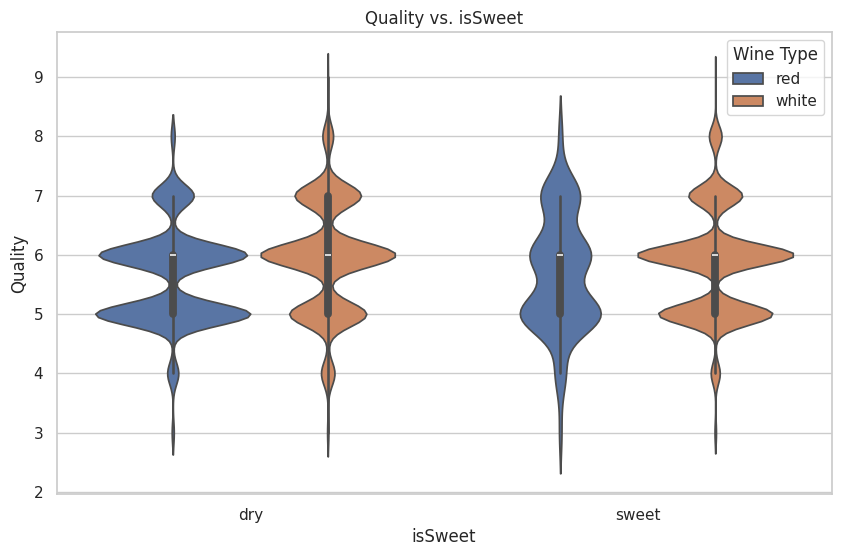

In [38]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='isSweet', y='quality', data=combined_df, hue='wine_type')
plt.title('Quality vs. isSweet')
plt.xlabel('isSweet')
plt.ylabel('Quality')
plt.legend(title='Wine Type')
plt.show()

From this plot, it appears that the quality distributions are different for red and white wine.

The  distribution of quality scores for red wines appears to be shifted to the right compared to the distribution for white wines. This suggests that red wines tend to be rated as higher quality than white wines on average in this dataset.

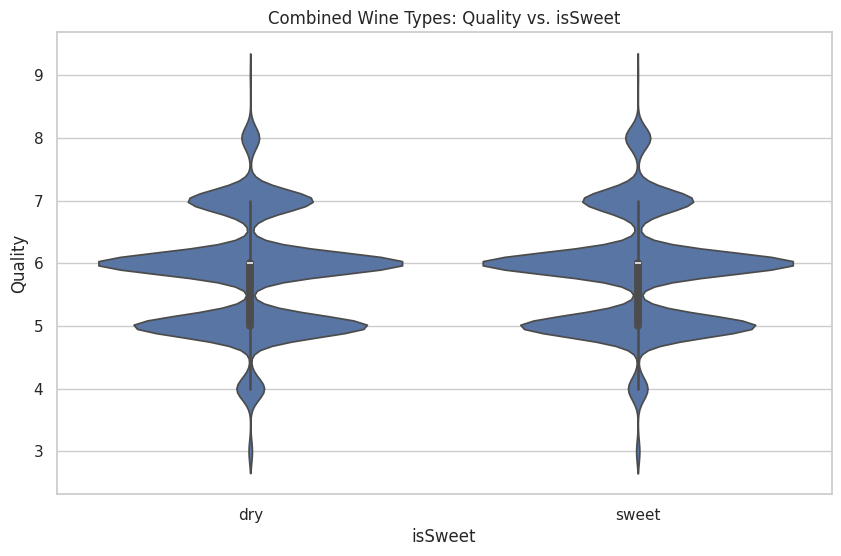

In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='isSweet', y='quality', data=combined_df)
plt.title('Combined Wine Types: Quality vs. isSweet')
plt.xlabel('isSweet')
plt.ylabel('Quality')
plt.show()

Putting them together and disregarding the colour reveals a broader distribution of quality scores. These are the two main observations I made:


* The overall distribution of quality scores appears to be wider than the individual distributions for red and white wines. This suggests there is more variation in quality scores when you consider both types of wine together. This is particularly noticeable with the sweet wines. There were not many high quality sweet red wines, but it this couldn't have been observed had I not plotted a graph separate for each coloured wine.

* The peak of the distribution is around a quality rating of 6, which means that there are more wines with a quality rating of 6 than any other rating. Based on the previous point, this is technically not true as it does not apply for red wines.



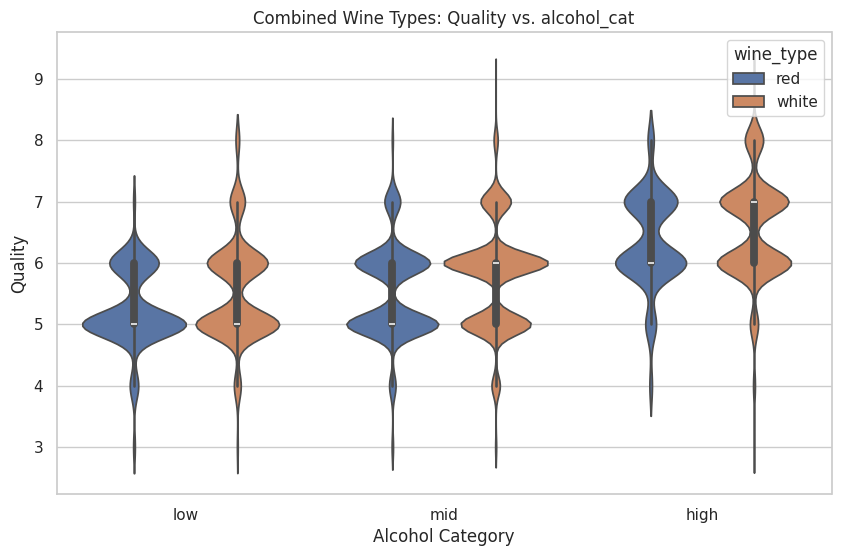

In [39]:
combined_alcohol_cat = pd.concat([red_wine_df, white_wine_df])

plt.figure(figsize=(10, 6))
sns.violinplot(x='alcohol_cat', y='quality', data=combined_alcohol_cat, hue='wine_type')
plt.title('Combined Wine Types: Quality vs. alcohol_cat')
plt.xlabel('Alcohol Category')
plt.ylabel('Quality')
plt.show()

Based on the violin plot, the quality distributions of red and white wines appear to be similar. There is overlap in the distribution of quality scores across the three alcohol categories (low, medium, high) for both red and white wines.

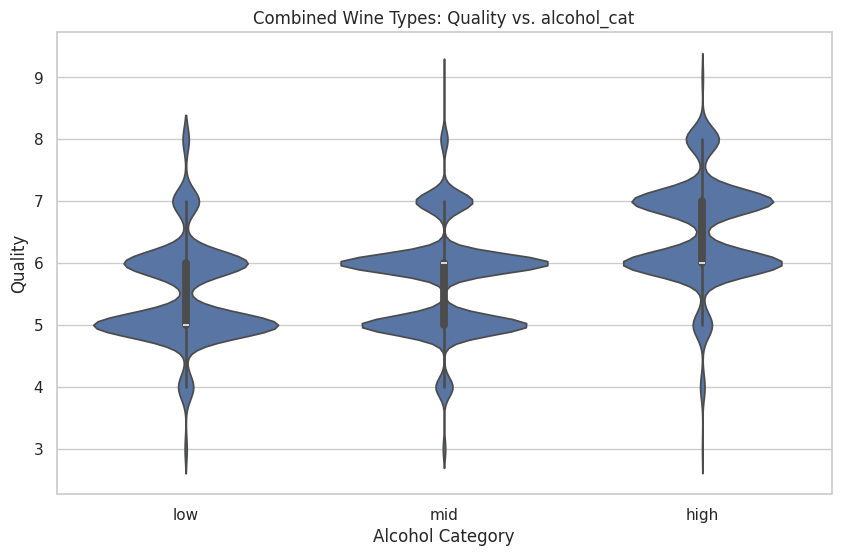

In [40]:
combined_alcohol_cat = pd.concat([red_wine_df, white_wine_df])

plt.figure(figsize=(10, 6))
sns.violinplot(x='alcohol_cat', y='quality', data=combined_alcohol_cat)
plt.title('Combined Wine Types: Quality vs. alcohol_cat')
plt.xlabel('Alcohol Category')
plt.ylabel('Quality')
plt.show()

Unlike when comparing factors like sweetness, where there might be inherent quality differences between red and white wines, colour seems to play a minimal role in the relationship between alcohol content and quality.

Most of the information from earlier seems to be preserved and I believe the same findings can be made from either plot. The violin plots, whether separated or combined, both suggest a positive correlation between alcohol content and perceived quality across all wines.

## Extensions Part 2 - Comparing Binary and Multi-Class Classification for Wine Quality Prediction

I will train and test a multi-class logistic regression model to predict wine quality across multiple classes. Then, I will train and test a binary classification model considering wines with a quality rating of 6 or higher as "positive" and those with a rating below 6 as "negative".

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

multi_class_model = LogisticRegression(multi_class='auto', max_iter=2000)
binary_class_model = LogisticRegression(max_iter=2000)

multi_class_model.fit(X_train_scaled, y_train)
binary_class_model.fit(X_train_scaled, y_train_binary)

y_pred_multi_class = multi_class_model.predict(X_test_scaled)
y_pred_binary = binary_class_model.predict(X_test_scaled)

print("Classification Report for Multi-class Classification:")
print(classification_report(y_test, y_pred_multi_class, zero_division=0))

print("\nClassification Report for Binary Classification:")
print(classification_report(y_test_binary, y_pred_binary, zero_division=0))

Classification Report for Multi-class Classification:
              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       1.00      0.12      0.21        43
           5       0.54      0.61      0.57       402
           6       0.54      0.68      0.60       597
           7       0.52      0.21      0.30       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.51      0.26      0.28      1300
weighted avg       0.54      0.54      0.51      1300


Classification Report for Binary Classification:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       451
           1       0.78      0.80      0.79       849

    accuracy                           0.73      1300
   macro avg       0.70      0.69      0.69      1300
weighted avg       0.72    


When attempting to predict all possible quality labels, the multi-class classification model shows poorer performance with an accuracy of 0.54. This lower accuracy arises due to the inherent complexity of categorizing wines into multiple quality levels, leading to difficulties in accurately distinguishing between different quality classes. As a result, the model struggles to achieve good scores and results in suboptimal performance.

The binary classification model simplifies the prediction task to a binary decision between two classes. The model is able to more effectively learn the distinguishing features that differentiate "low" quality wines from "high" quality one, thus achieving better performance metrics.